## Data Mining Project - Deliverable 1

In this project we will follow the CRIPS-DM methodology. We will start with :

### **Business Understanding:**
We want to segment the costumers in the Loyalty Program of AIAI Airlines. We want to explore value-based segmentation, behavioral segmentation and demographic segmentation. Ultimeltly we want to combine the three perspectives into a final segmentation framework.

For this we have two available datasets:
    - DM_AIAI_CustomerDB.csv : with information regarding the costumers
    - DM_AIAI_FlightsDB.csv : with information regarding the costumers' flying activity with AIAI Airlines

### **Data Understanding :**


In [1]:
# import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import openpyxl 
from math import ceil

In [2]:
# read the available files
df_customerDB = pd.read_csv('DM_AIAI_CustomerDB.csv')
df_flightsDB = pd.read_csv('DM_AIAI_FlightsDB.csv')
df_metadata = pd.read_csv('DM_AIAI_Metadata.csv', sep=';') # this file is not comma separated but semicolon separated

We have 3 variables dedicated to the time, this is tripling its significance, we should probably merge the 3 and crete a date time variable.
Check if there is a relationship between the Distance and the Points acummulated, or the number of flights. The points redeemed and the Cost of the points redeemed is probably redundante.

Loyalty is the costumer identifier so it should be the index for the costumers dataset

In [3]:
df_customerDB.head()

,Unnamed: 0,Loyalty#,First Name,Last Name,Customer Name,Country,Province or State,City,Latitude,Longitude,...,Gender,Education,Location Code,Income,Marital Status,LoyaltyStatus,EnrollmentDateOpening,CancellationDate,Customer Lifetime Value,EnrollmentType
0,0,480934,Cecilia,Householder,Cecilia Householder,Canada,Ontario,Toronto,43.653225,-79.383186,...,female,Bachelor,Urban,70146.0,Married,Star,2/15/2019,NaN,3839.14,Standard
1,1,549612,Dayle,Menez,Dayle Menez,Canada,Alberta,Edmonton,53.544388,-113.490930,...,male,College,Rural,0.0,Divorced,Star,3/9/2019,NaN,3839.61,Standard
2,2,429460,Necole,Hannon,Necole Hannon,Canada,British Columbia,Vancouver,49.282730,-123.120740,...,male,College,Urban,0.0,Single,Star,7/14/2017,1/8/2021,3839.75,Standard
3,3,608370,Queen,Hagee,Queen Hagee,Canada,Ontario,Toronto,43.653225,-79.383186,...,male,College,Suburban,0.0,Single,Star,2/17/2016,NaN,3839.75,Standard
4,4,530508,Claire,Latting,Claire Latting,Canada,Quebec,Hull,45.428730,-75.713364,...,male,Bachelor,Suburban,97832.0,Married,Star,10/25/2017,NaN,3842.79,2021 Promotion


In [4]:
df_customerDB.columns

Index(['Unnamed: 0', 'Loyalty#', 'First Name', 'Last Name', 'Customer Name',
       'Country', 'Province or State', 'City', 'Latitude', 'Longitude',
       'Postal code', 'Gender', 'Education', 'Location Code', 'Income',
       'Marital Status', 'LoyaltyStatus', 'EnrollmentDateOpening',
       'CancellationDate', 'Customer Lifetime Value', 'EnrollmentType'],
      dtype='object')

In [5]:
df_customerDB.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16921 entries, 0 to 16920
Data columns (total 21 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Unnamed: 0               16921 non-null  int64  
 1   Loyalty#                 16921 non-null  int64  
 2   First Name               16921 non-null  object 
 3   Last Name                16921 non-null  object 
 4   Customer Name            16921 non-null  object 
 5   Country                  16921 non-null  object 
 6   Province or State        16921 non-null  object 
 7   City                     16921 non-null  object 
 8   Latitude                 16921 non-null  float64
 9   Longitude                16921 non-null  float64
 10  Postal code              16921 non-null  object 
 11  Gender                   16921 non-null  object 
 12  Education                16921 non-null  object 
 13  Location Code            16921 non-null  object 
 14  Income                

Check the cancellation date, if we need to 

From here we can see that apparently only the Cancellation Date and the Costumer Lifetime Value have Null values. For the cancellation date it is expected, because it probably means the costumer is still in the program. For the Costumer Lifetime Value, it doesnt make as much sense

Lets split the variables in numerical and categorical. The ones whos Dtype is object will be continuous.

In [6]:
costumers_num_var = ['Latitude','Longitude','Income','Customer Lifetime Value']
costumers_cat_var = df_customerDB.columns.drop(costumers_num_var)
print(costumers_cat_var)

Index(['Unnamed: 0', 'Loyalty#', 'First Name', 'Last Name', 'Customer Name',
       'Country', 'Province or State', 'City', 'Postal code', 'Gender',
       'Education', 'Location Code', 'Marital Status', 'LoyaltyStatus',
       'EnrollmentDateOpening', 'CancellationDate', 'EnrollmentType'],
      dtype='object')


In [7]:
costumers_categories = ['Country', 'Province or State','City', 'Gender', 'Education', 'Marital Status', 'LoyaltyStatus', 'EnrollmentType']

for feat in costumers_categories:
    print(f'{feat}:')
    print(df_customerDB[feat].unique())



Country:
['Canada']
Province or State:
['Ontario' 'Alberta' 'British Columbia' 'Quebec' 'Yukon' 'New Brunswick'
 'Manitoba' 'Nova Scotia' 'Saskatchewan' 'Newfoundland'
 'Prince Edward Island']
City:
['Toronto' 'Edmonton' 'Vancouver' 'Hull' 'Whitehorse' 'Trenton' 'Montreal'
 'Dawson Creek' 'Quebec City' 'Moncton' 'Fredericton' 'Ottawa' 'Tremblant'
 'Calgary' 'Whistler' 'Thunder Bay' 'Peace River' 'Winnipeg' 'Sudbury'
 'West Vancouver' 'Halifax' 'London' 'Victoria' 'Regina' 'Kelowna'
 "St. John's" 'Kingston' 'Banff' 'Charlottetown']
Gender:
['female' 'male']
Education:
['Bachelor' 'College' 'Master' 'High School or Below' 'Doctor']
Marital Status:
['Married' 'Divorced' 'Single']
LoyaltyStatus:
['Star' 'Aurora' 'Nova']
EnrollmentType:
['Standard' '2021 Promotion']


From this we can see that the only column we have is Canada, which makes this feature not relevant for data segmentation. We can also see the possible values for the other features. There doesnt seems to be a problem with the data. 

We will remove the Country feature but only on the part of the project of Feature Engineering

In [8]:
df_customerDB.isna().sum()

Unnamed: 0                     0
Loyalty#                       0
First Name                     0
Last Name                      0
Customer Name                  0
Country                        0
Province or State              0
City                           0
Latitude                       0
Longitude                      0
Postal code                    0
Gender                         0
Education                      0
Location Code                  0
Income                        20
Marital Status                 0
LoyaltyStatus                  0
EnrollmentDateOpening          0
CancellationDate           14611
Customer Lifetime Value       20
EnrollmentType                 0
dtype: int64

In [9]:
df_customerDB.describe().T

,count,mean,std,min,25%,50%,75%,max
Unnamed: 0,16921.0,8440.023639,4884.775439,0.000000,4210.000000,8440.000000,12670.000000,16900.000000
Loyalty#,16921.0,550197.393771,259251.503597,100011.000000,326823.000000,550896.000000,772438.000000,999999.000000
Latitude,16921.0,47.174500,3.307971,42.984924,44.231171,46.087818,49.282730,60.721188
Longitude,16921.0,-91.814768,22.242429,-135.056840,-120.237660,-79.383186,-74.596184,-52.712578
Income,16901.0,37758.038400,30368.992499,0.000000,0.000000,34161.000000,62396.000000,99981.000000
Customer Lifetime Value,16901.0,7990.460188,6863.173093,1898.010000,3979.720000,5780.180000,8945.690000,83325.380000


at least 25% of the costumers have no income, weird

In [10]:
df_customerDB.describe(include='object').T

,count,unique,top,freq
First Name,16921,4941,Stacey,13
Last Name,16921,15404,Ypina,4
Customer Name,16921,16921,Emma Martin,1
Country,16921,1,Canada,16921
Province or State,16921,11,Ontario,5468
City,16921,29,Toronto,3390
Postal code,16921,75,V6E 3D9,917
Gender,16921,2,female,8497
Education,16921,5,Bachelor,10586
Location Code,16921,3,Suburban,5716


Almost half of the costumers are married
We only have one Country, not relevant for segmentation
Check if the states and cities are correct, in Canada
Almost half has a Bachelor
Almost half is female
Almost everyone has Standar Enrollment type, are the remaining associated with very high income? can we create a group by this

In [11]:
df_customerDB.duplicated().sum()

np.int64(0)

We have no total duplicates. We will check dupplicates especifically for the Loyalty# since we will use it as the costumer ID and for the Unnamed: 0

In [12]:
df_customerDB.duplicated(subset='Loyalty#').sum()

np.int64(164)

In [13]:
df_customerDB[df_customerDB.duplicated(subset='Loyalty#')]

,Unnamed: 0,Loyalty#,First Name,Last Name,Customer Name,Country,Province or State,City,Latitude,Longitude,...,Gender,Education,Location Code,Income,Marital Status,LoyaltyStatus,EnrollmentDateOpening,CancellationDate,Customer Lifetime Value,EnrollmentType
370,370,354438,Marla,Heinicke,Marla Heinicke,Canada,Ontario,Toronto,43.653225,-79.383186,...,male,Bachelor,Rural,34640.0,Married,Star,7/11/2015,NaN,4530.53,Standard
1986,1986,687951,Burma,Cordill,Burma Cordill,Canada,Quebec,Montreal,45.501690,-73.567253,...,male,Bachelor,Rural,37751.0,Single,Aurora,7/29/2021,NaN,7249.07,Standard
2322,2322,615439,Thalia,Cabos,Thalia Cabos,Canada,Ontario,Toronto,43.653225,-79.383186,...,female,Bachelor,Urban,44698.0,Married,Aurora,10/21/2017,NaN,7918.33,Standard
2416,2416,156031,Onie,Grech,Onie Grech,Canada,Quebec,Montreal,45.501690,-73.567253,...,female,Bachelor,Urban,50825.0,Married,Aurora,5/24/2019,NaN,8092.88,Standard
2442,2442,825593,Rose,Mcgregor,Rose Mcgregor,Canada,Ontario,Toronto,43.653225,-79.383186,...,female,High School or Below,Suburban,24992.0,Married,Aurora,5/18/2020,NaN,8139.00,Standard
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16488,16488,373638,Sherryl,Vanduyn,Sherryl Vanduyn,Canada,Quebec,Tremblant,46.118462,-74.596184,...,female,College,Rural,0.0,Single,Star,7/30/2021,NaN,18898.33,Standard
16625,16625,727507,Marnie,Kisner,Marnie Kisner,Canada,Alberta,Banff,51.178398,-115.570800,...,male,Bachelor,Suburban,93011.0,Divorced,Star,12/26/2020,NaN,22643.83,Standard
16766,16766,278854,Marylee,Villicana,Marylee Villicana,Canada,Quebec,Tremblant,46.118462,-74.596184,...,female,High School or Below,Urban,20799.0,Single,Star,8/16/2017,NaN,28328.47,Standard
16775,16775,434807,Cira,Nalley,Cira Nalley,Canada,Alberta,Edmonton,53.544388,-113.490930,...,male,Bachelor,Rural,35296.0,Single,Star,8/27/2015,NaN,29194.37,Standard


In [14]:
df_customerDB[df_customerDB['Loyalty#'] == 368073]

,Unnamed: 0,Loyalty#,First Name,Last Name,Customer Name,Country,Province or State,City,Latitude,Longitude,...,Gender,Education,Location Code,Income,Marital Status,LoyaltyStatus,EnrollmentDateOpening,CancellationDate,Customer Lifetime Value,EnrollmentType
5003,5003,368073,Rufus,Dannenberg,Rufus Dannenberg,Canada,Quebec,Montreal,45.501690,-73.567253,...,female,Doctor,Suburban,19447.0,Married,Nova,3/27/2020,NaN,3336.22,Standard
16881,16881,368073,Enedina,Dickason,Enedina Dickason,Canada,Quebec,Quebec City,46.813877,-71.207977,...,male,Bachelor,Urban,66661.0,Single,Star,3/20/2018,NaN,42561.63,Standard


In [15]:
df_customerDB.duplicated(subset='Unnamed: 0').sum()

np.int64(20)

In [16]:
df_customerDB[df_customerDB.duplicated(subset='Unnamed: 0')].sort_values(['Unnamed: 0'])

,Unnamed: 0,Loyalty#,First Name,Last Name,Customer Name,Country,Province or State,City,Latitude,Longitude,...,Gender,Education,Location Code,Income,Marital Status,LoyaltyStatus,EnrollmentDateOpening,CancellationDate,Customer Lifetime Value,EnrollmentType
16901,0,999987,Layla,Murphy,Layla Murphy,Canada,New Brunswick,Fredericton,46.029263,-66.565150,...,female,Bachelor,Urban,NaN,Single,Star,3/7/2017,3/7/2017,NaN,Standard
16902,1,999988,Jana,Parker,Jana Parker,Canada,Quebec,Montreal,45.573672,-73.523012,...,male,College,Rural,NaN,Single,Star,8/22/2017,8/22/2017,NaN,Standard
16903,2,999989,Ethan,Parker,Ethan Parker,Canada,Ontario,Trenton,44.075379,-77.550375,...,male,College,Rural,NaN,Married,Star,9/12/2015,9/12/2015,NaN,Standard
16904,3,999990,Ryan,Anderson,Ryan Anderson,Canada,New Brunswick,Moncton,46.106617,-64.714267,...,female,College,Rural,NaN,Married,Star,6/10/2019,6/10/2019,NaN,Standard
16905,4,999991,Olivia,Cote,Olivia Cote,Canada,New Brunswick,Fredericton,45.950000,-66.652437,...,female,College,Suburban,NaN,Married,Star,7/20/2019,7/20/2019,NaN,Standard
16906,5,999992,Ella,Roy,Ella Roy,Canada,Ontario,Toronto,43.706878,-79.437412,...,male,College,Suburban,NaN,Single,Star,3/27/2021,3/27/2021,NaN,Standard
16907,6,999993,Elijah,Cook,Elijah Cook,Canada,British Columbia,Dawson Creek,55.701475,-120.181716,...,female,College,Suburban,NaN,Married,Star,1/27/2015,1/27/2015,NaN,Standard
16908,7,999994,Ethan,Chan,Ethan Chan,Canada,Ontario,Ottawa,45.365906,-75.723181,...,female,College,Rural,NaN,Married,Star,5/5/2016,5/5/2016,NaN,Standard
16909,8,999995,Liam,Wong,Liam Wong,Canada,Ontario,Ottawa,45.471557,-75.704868,...,female,College,Suburban,NaN,Married,Star,3/2/2020,3/2/2020,NaN,Standard
16910,9,999996,Isabella,Ross,Isabella Ross,Canada,Ontario,Toronto,43.690489,-79.436758,...,female,Bachelor,Suburban,NaN,Single,Star,9/14/2018,9/14/2018,NaN,Standard


We have 16921 observations in the costumers data set. It seems that after 16900, the index started again at 0.
All started and left in the same day, enter by the Standard mode.
We will investigate this columns

In [17]:
columns_incorrect_index = df_customerDB[df_customerDB.duplicated(subset='Unnamed: 0')].sort_values(['Unnamed: 0'])['Loyalty#']
columns_incorrect_index

16901    999987
16902    999988
16903    999989
16904    999990
16905    999991
16906    999992
16907    999993
16908    999994
16909    999995
16910    999996
16911    999997
16912    999998
16913    999999
16914    100017
16915    100011
16916    100012
16917    100013
16918    100014
16919    100015
16920    100016
Name: Loyalty#, dtype: int64

Lets check if they have any corresponding information in the flights data set

In [18]:
# for one in particular
df_flightsDB[df_flightsDB['Loyalty#']==100016]

,Loyalty#,Year,Month,YearMonthDate,NumFlights,NumFlightsWithCompanions,DistanceKM,PointsAccumulated,PointsRedeemed,DollarCostPointsRedeemed


In [19]:
# for all of them
df_flightsDB[df_flightsDB['Loyalty#'].isin(columns_incorrect_index)]

,Loyalty#,Year,Month,YearMonthDate,NumFlights,NumFlightsWithCompanions,DistanceKM,PointsAccumulated,PointsRedeemed,DollarCostPointsRedeemed


There is no flight information about these costumers. We will probably drop them in the Data Preparation

Lets analyse the flights dataset

In [20]:
df_flightsDB.head()

,Loyalty#,Year,Month,YearMonthDate,NumFlights,NumFlightsWithCompanions,DistanceKM,PointsAccumulated,PointsRedeemed,DollarCostPointsRedeemed
0,413052,2021,12,12/1/2021,2.0,2.0,9384.0,938.0,0.0,0.0
1,464105,2021,12,12/1/2021,0.0,0.0,0.0,0.0,0.0,0.0
2,681785,2021,12,12/1/2021,10.0,3.0,14745.0,1474.0,0.0,0.0
3,185013,2021,12,12/1/2021,16.0,4.0,26311.0,2631.0,3213.0,32.0
4,216596,2021,12,12/1/2021,9.0,0.0,19275.0,1927.0,0.0,0.0


Lets check if the duplicates in the costumers Loyalty# are also in the flights data set. 368073 is an exemple of a Loyalty# of the duplicates

In [21]:
df_flightsDB[df_flightsDB['Loyalty#'] == 368073].sort_values(['Year', 'Month'])

,Loyalty#,Year,Month,YearMonthDate,NumFlights,NumFlightsWithCompanions,DistanceKM,PointsAccumulated,PointsRedeemed,DollarCostPointsRedeemed
410620,368073,2019,1,1/1/2019,0.0,0.0,0.0,0.0,0.0,0.0
410621,368073,2019,1,1/1/2019,0.0,0.0,0.0,0.0,0.0,0.0
427521,368073,2019,2,2/1/2019,0.0,0.0,0.0,0.0,0.0,0.0
427522,368073,2019,2,2/1/2019,0.0,0.0,0.0,0.0,0.0,0.0
444422,368073,2019,3,3/1/2019,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...
168048,368073,2021,10,10/1/2021,0.0,0.0,0.0,0.0,0.0,0.0
93847,368073,2021,11,11/1/2021,0.0,0.0,0.0,0.0,0.0,0.0
101885,368073,2021,11,11/1/2021,0.0,0.0,0.0,0.0,0.0,0.0
109733,368073,2021,12,12/1/2021,11.0,0.0,20666.0,2066.0,0.0,0.0


We also have the duplicates here and their information is different

It is also duplicated in the flights data set

In [22]:
df_flightsDB.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 608436 entries, 0 to 608435
Data columns (total 10 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   Loyalty#                  608436 non-null  int64  
 1   Year                      608436 non-null  int64  
 2   Month                     608436 non-null  int64  
 3   YearMonthDate             608436 non-null  object 
 4   NumFlights                608436 non-null  float64
 5   NumFlightsWithCompanions  608436 non-null  float64
 6   DistanceKM                608436 non-null  float64
 7   PointsAccumulated         608436 non-null  float64
 8   PointsRedeemed            608436 non-null  float64
 9   DollarCostPointsRedeemed  608436 non-null  float64
dtypes: float64(6), int64(3), object(1)
memory usage: 46.4+ MB


Number of flights and Number of flights with Companions should be integer but are floats. 

In [23]:
df_flightsDB.describe().T

,count,mean,std,min,25%,50%,75%,max
Loyalty#,608436.0,550037.873084,258935.180575,100018.0,326961.00,550834.000,772194.0000,999986.0
Year,608436.0,2020.000000,0.816497,2019.0,2019.00,2020.000,2021.0000,2021.0
Month,608436.0,6.500000,3.452055,1.0,3.75,6.500,9.2500,12.0
NumFlights,608436.0,3.908107,5.057889,0.0,0.00,0.000,7.2000,21.0
NumFlightsWithCompanions,608436.0,0.983944,2.003785,0.0,0.00,0.000,0.9000,11.0
DistanceKM,608436.0,7939.341419,10260.421873,0.0,0.00,856.400,15338.1750,42040.0
PointsAccumulated,608436.0,793.777781,1025.918521,0.0,0.00,85.275,1533.7125,4204.0
PointsRedeemed,608436.0,235.251678,983.233374,0.0,0.00,0.000,0.0000,7496.0
DollarCostPointsRedeemed,608436.0,2.324835,9.725168,0.0,0.00,0.000,0.0000,74.0


In [24]:
df_flightsDB.describe(include='object').T

,count,unique,top,freq
YearMonthDate,608436,36,12/1/2021,16901


In [25]:
df_flightsDB['NumFlights'].value_counts()

NumFlights
0.0     304524
9.0      20344
3.0      18228
11.0     15705
5.0      15084
7.0      14561
8.0      14357
6.0      13847
2.0      13641
10.0     13363
4.0      12821
1.0      12667
13.0     10782
12.0     10382
9.9       7537
14.0      7057
2.7       6910
6.3       6772
7.2       6720
5.4       6678
15.0      6582
8.1       6527
3.6       6519
4.5       6369
1.8       6314
0.9       5851
10.8      5392
11.7      5167
16.0      4354
17.0      3899
18.0      3507
13.5      3272
12.6      3249
14.4      2165
15.3      1817
19.0      1496
16.2      1364
20.0      1156
17.1       696
21.0       528
18.9       232
Name: count, dtype: int64

We have a lot of floats for example 9.9 flights appear 7537 times in teh data set. 
The result should be a number. We should round it.

In [26]:
df_flightsDB['NumFlights'].nunique()


41

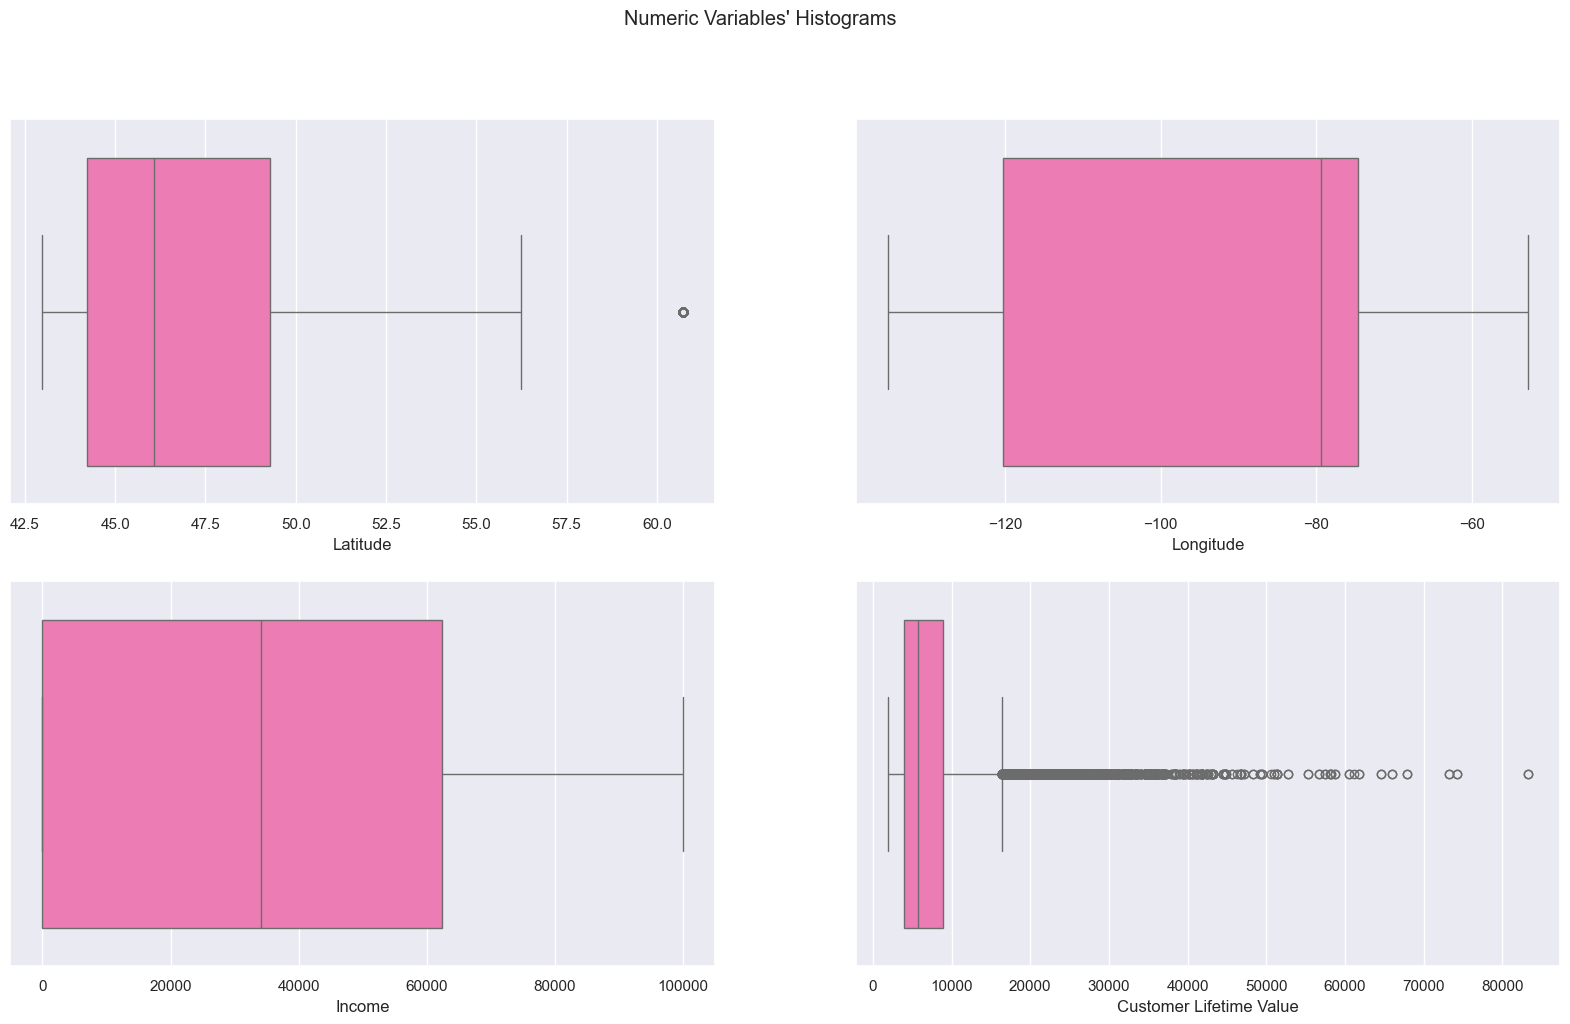

In [27]:
sns.set()

# We will put all the numeric variables' histograms in one figure
# Prepare figure. Create individual axes where each histogram will be placed
fig, axes = plt.subplots(2, ceil(len(costumers_num_var) / 2 ), figsize = (20, 11))

for ax, feat in zip(axes.flatten(), costumers_num_var):
    sns.boxplot(x=df_customerDB[feat], ax=ax, color='hotpink')

# Add a centered title to the figure:
plt.suptitle("Numeric Variables' Histograms")

plt.show()

In [29]:
flights_num_var = df_flightsDB.columns.drop('YearMonthDate')

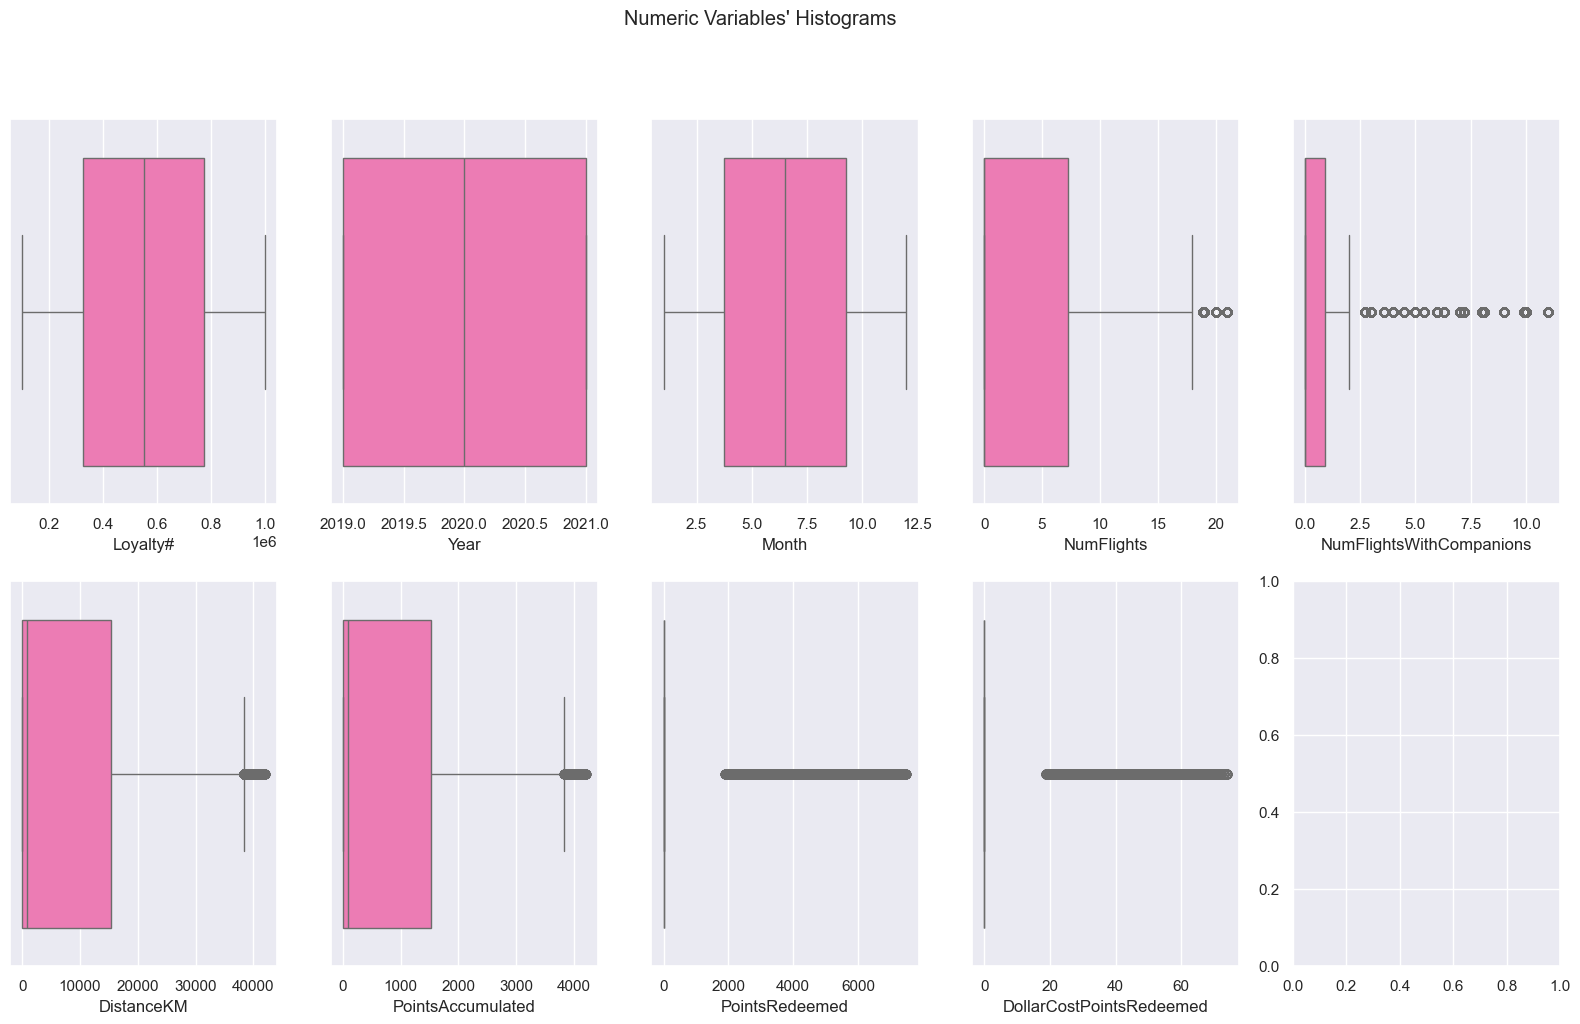

In [30]:
sns.set()

# We will put all the numeric variables' histograms in one figure
# Prepare figure. Create individual axes where each histogram will be placed
fig, axes = plt.subplots(2, ceil(len(flights_num_var) / 2 ), figsize = (20, 11))

for ax, feat in zip(axes.flatten(), flights_num_var):
    sns.boxplot(x=df_flightsDB[feat], ax=ax, color='hotpink')

# Add a centered title to the figure:
plt.suptitle("Numeric Variables' Histograms")

plt.show()

### Data Preparation

What we will do based on the Data Understanding:
- Drop the observations with duplicate in the column Unnamed:0
- Drop the column Unnamed: 0 and take as index the Loyalty#
- Round the numbers in the Number of flights and number of flights with companions
- Deal with the duplicates in the Loyalty#
- Drop Country, First Name, Last Name, Month, Year
- Deal with the null values
- Merge the datasets by the Loyalty#